In [158]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [159]:
df = pd.read_csv("train.csv",  index_col="Id")

In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

## Pre-Proccessing

Replacing missing values with approproate values for corresponding columns according to data dictionary.

### Handling missing values

In [161]:
df.loc[:, "Alley"] = df.loc[:, "Alley"].fillna("None")
df.loc[:, "BedroomAbvGr"] = df.loc[:, "BedroomAbvGr"].fillna(0)
df.loc[:, "BsmtQual"] = df.loc[:, "BsmtQual"].fillna("No")
df.loc[:, "BsmtCond"] = df.loc[:, "BsmtCond"].fillna("No")
df.loc[:, "BsmtExposure"] = df.loc[:, "BsmtExposure"].fillna("No")
df.loc[:, "BsmtFinType1"] = df.loc[:, "BsmtFinType1"].fillna("No")
df.loc[:, "BsmtFinType2"] = df.loc[:, "BsmtFinType2"].fillna("No")
df.loc[:, "BsmtFullBath"] = df.loc[:, "BsmtFullBath"].fillna(0)
df.loc[:, "BsmtHalfBath"] = df.loc[:, "BsmtHalfBath"].fillna(0)
df.loc[:, "BsmtUnfSF"] = df.loc[:, "BsmtUnfSF"].fillna(0)
df.loc[:, "CentralAir"] = df.loc[:, "CentralAir"].fillna("N")
df.loc[:, "Condition1"] = df.loc[:, "Condition1"].fillna("Norm")
df.loc[:, "Condition2"] = df.loc[:, "Condition2"].fillna("Norm")
df.loc[:, "EnclosedPorch"] = df.loc[:, "EnclosedPorch"].fillna(0)
df.loc[:, "ExterCond"] = df.loc[:, "ExterCond"].fillna("TA")
df.loc[:, "ExterQual"] = df.loc[:, "ExterQual"].fillna("TA")
df.loc[:, "Fence"] = df.loc[:, "Fence"].fillna("No")
df.loc[:, "FireplaceQu"] = df.loc[:, "FireplaceQu"].fillna("No")
df.loc[:, "Fireplaces"] = df.loc[:, "Fireplaces"].fillna(0)
df.loc[:, "Functional"] = df.loc[:, "Functional"].fillna("Typ")
df.loc[:, "GarageType"] = df.loc[:, "GarageType"].fillna("No")
df.loc[:, "GarageFinish"] = df.loc[:, "GarageFinish"].fillna("No")
df.loc[:, "GarageQual"] = df.loc[:, "GarageQual"].fillna("No")
df.loc[:, "GarageCond"] = df.loc[:, "GarageCond"].fillna("No")
df.loc[:, "GarageArea"] = df.loc[:, "GarageArea"].fillna(0)
df.loc[:, "GarageCars"] = df.loc[:, "GarageCars"].fillna(0)
df.loc[:, "HalfBath"] = df.loc[:, "HalfBath"].fillna(0)
df.loc[:, "HeatingQC"] = df.loc[:, "HeatingQC"].fillna("TA")
df.loc[:, "KitchenAbvGr"] = df.loc[:, "KitchenAbvGr"].fillna(0)
df.loc[:, "KitchenQual"] = df.loc[:, "KitchenQual"].fillna("TA")
df.loc[:, "LotFrontage"] = df.loc[:, "LotFrontage"].fillna(0)
df.loc[:, "LotShape"] = df.loc[:, "LotShape"].fillna("Reg")
df.loc[:, "MasVnrType"] = df.loc[:, "MasVnrType"].fillna("None")
df.loc[:, "MasVnrArea"] = df.loc[:, "MasVnrArea"].fillna(0)
df.loc[:, "MiscFeature"] = df.loc[:, "MiscFeature"].fillna("No")
df.loc[:, "MiscVal"] = df.loc[:, "MiscVal"].fillna(0)
df.loc[:, "OpenPorchSF"] = df.loc[:, "OpenPorchSF"].fillna(0)
df.loc[:, "PavedDrive"] = df.loc[:, "PavedDrive"].fillna("N")
df.loc[:, "PoolQC"] = df.loc[:, "PoolQC"].fillna("No")
df.loc[:, "PoolArea"] = df.loc[:, "PoolArea"].fillna(0)
df.loc[:, "SaleCondition"] = df.loc[:, "SaleCondition"].fillna("Normal")
df.loc[:, "ScreenPorch"] = df.loc[:, "ScreenPorch"].fillna(0)
df.loc[:, "TotRmsAbvGrd"] = df.loc[:, "TotRmsAbvGrd"].fillna(0)
df.loc[:, "Utilities"] = df.loc[:, "Utilities"].fillna("AllPub")
df.loc[:, "WoodDeckSF"] = df.loc[:, "WoodDeckSF"].fillna(0)

In [162]:
train_nas = df.isnull().sum()
train_nas = train_nas[train_nas>0]
train_nas.sort_values(ascending=False)

GarageYrBlt    81
Electrical      1
dtype: int64

In [163]:
df["GarageYrBlt"] = df["GarageYrBlt"].fillna(df["GarageYrBlt"].median())
df["Electrical"] = df["Electrical"].fillna("SBrkr")

In [164]:
df.isnull().sum().sum()

0

All the missing values are now handled.

### Handling categorical variables

In [165]:
df = df.replace({"MSSubClass" : {20 : "CLS20", 30 : "CLS30", 40 : "CLS40", 45 : "CLS45", 
                                       50 : "CLS50", 60 : "CLS60", 70 : "CLS70", 75 : "CLS75", 
                                       80 : "CLS80", 85 : "CLS85", 90 : "CLS90", 120 : "CLS120", 
                                       150 : "CLS150", 160 : "CLS160", 180 : "CLS180", 190 : "CLS190"},
                       "MoSold" : {1 : "Jan", 2 : "Feb", 3 : "Mar", 4 : "Apr", 5 : "May", 6 : "Jun",
                                   7 : "Jul", 8 : "Aug", 9 : "Sep", 10 : "Oct", 11 : "Nov", 12 : "Dec"}
                      })

In [166]:
df = df.replace({"Alley" : {"Grvl" : 1, "Pave" : 2},
                       "BsmtCond" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "BsmtExposure" : {"No" : 0, "Mn" : 1, "Av": 2, "Gd" : 3},
                       "BsmtFinType1" : {"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                       "BsmtFinType2" : {"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                       "BsmtQual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA": 3, "Gd" : 4, "Ex" : 5},
                       "ExterCond" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "ExterQual" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "FireplaceQu" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "Functional" : {"Sal" : 1, "Sev" : 2, "Maj2" : 3, "Maj1" : 4, "Mod": 5, 
                                       "Min2" : 6, "Min1" : 7, "Typ" : 8},
                       "GarageCond" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "GarageQual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "HeatingQC" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "KitchenQual" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "LandSlope" : {"Sev" : 1, "Mod" : 2, "Gtl" : 3},
                       "LotShape" : {"IR3" : 1, "IR2" : 2, "IR1" : 3, "Reg" : 4},
                       "PavedDrive" : {"N" : 0, "P" : 1, "Y" : 2},
                       "PoolQC" : {"No" : 0, "Fa" : 1, "TA" : 2, "Gd" : 3, "Ex" : 4},
                       "Street" : {"Grvl" : 1, "Pave" : 2},
                       "Utilities" : {"ELO" : 1, "NoSeWa" : 2, "NoSewr" : 3, "AllPub" : 4}}
                     )

## Visualization

In [167]:
import matplotlib.pyplot as plt
import seaborn as sns

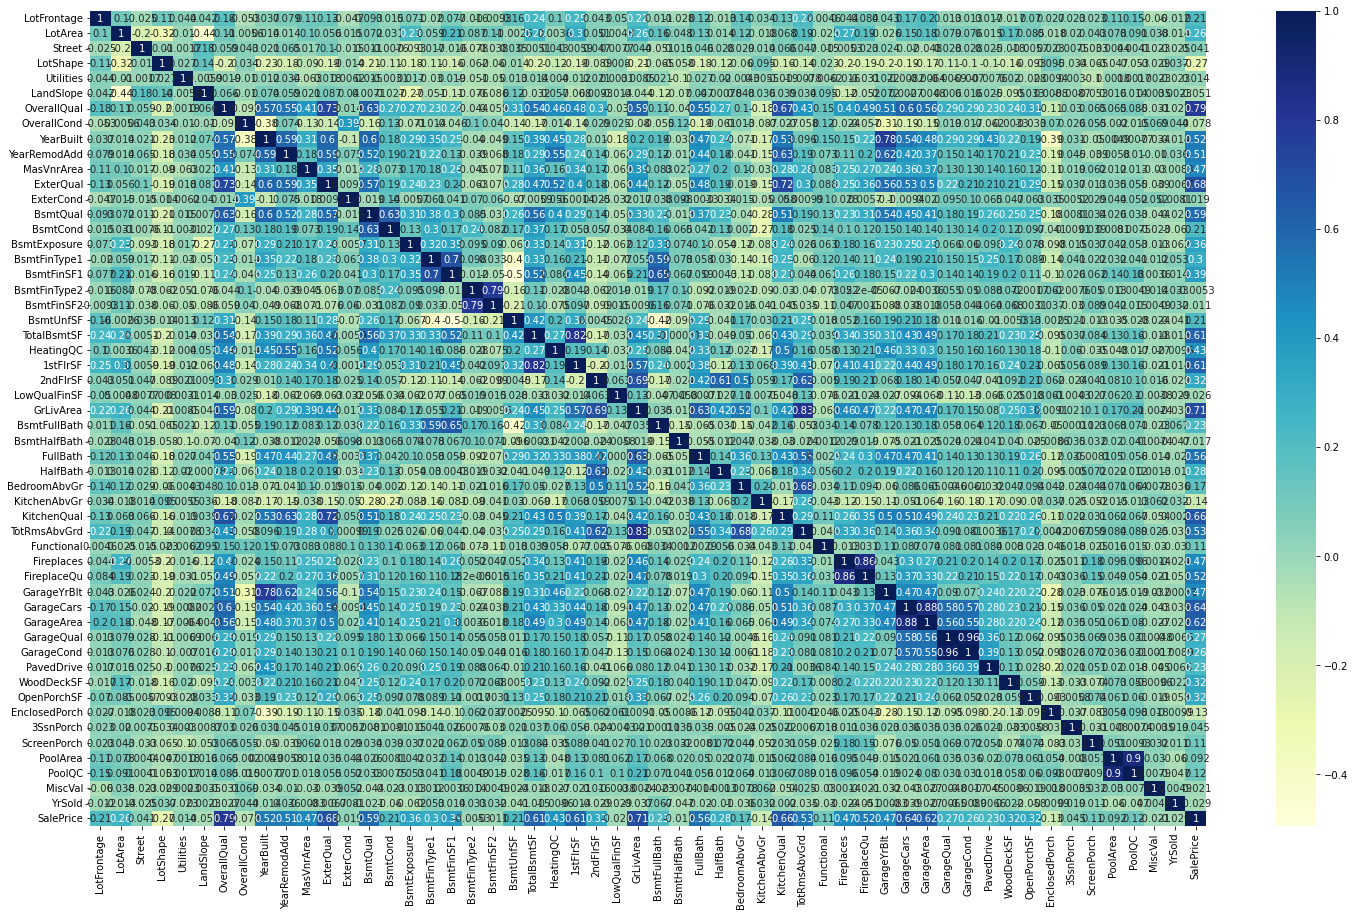

In [107]:
plt.figure(figsize = (25, 15))
sns.heatmap(df.corr(), annot = True, cmap="YlGnBu")
plt.show()

Below are the most correlated features

In [168]:
corr_matrix = df.corr()
top_corr_features = corr_matrix.index[abs(corr_matrix["SalePrice"])>0.5]
print(top_corr_features)

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'ExterQual', 'BsmtQual',
       'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'KitchenQual',
       'TotRmsAbvGrd', 'FireplaceQu', 'GarageCars', 'GarageArea', 'SalePrice'],
      dtype='object')


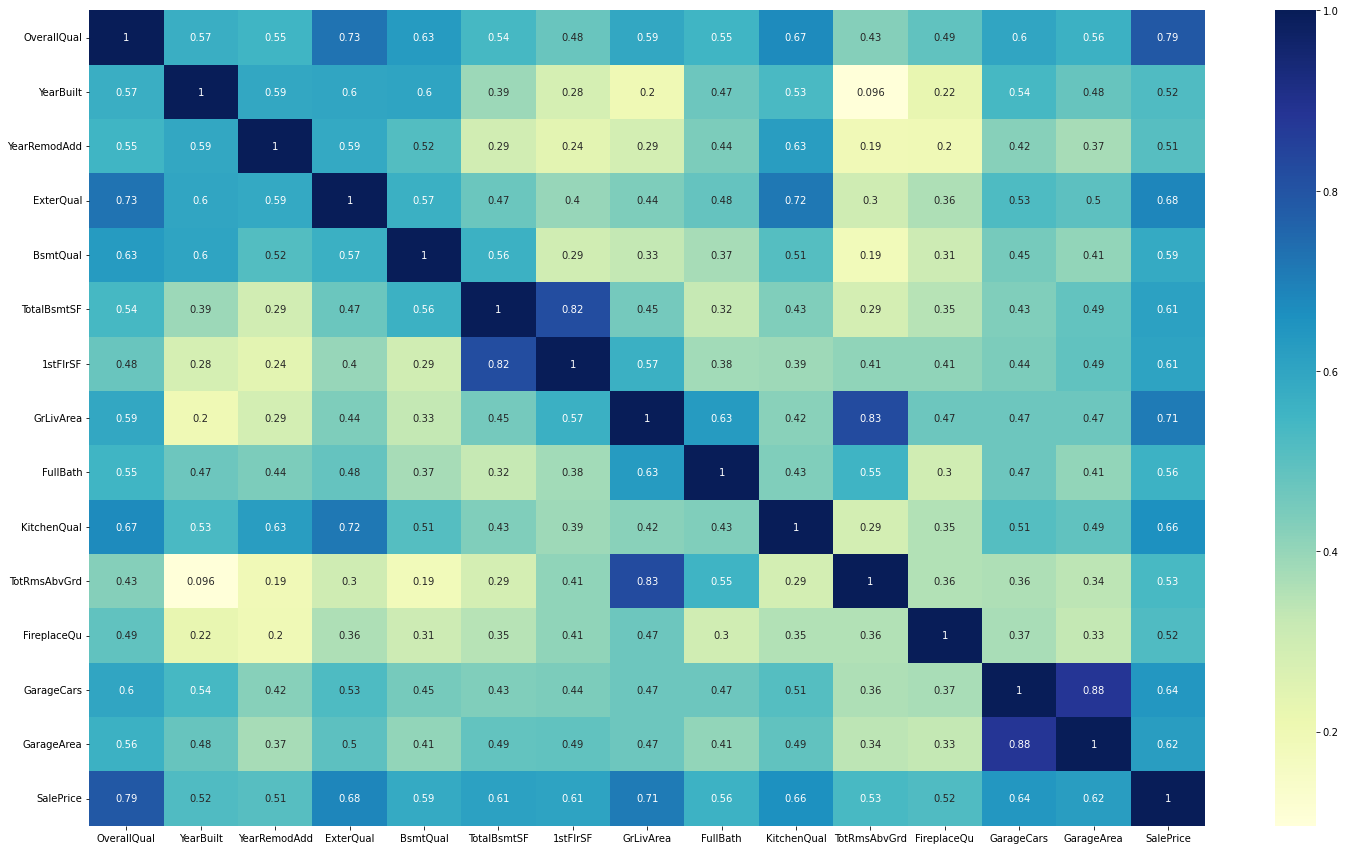

In [109]:
plt.figure(figsize = (25, 15))
sns.heatmap(df[top_corr_features].corr(), annot = True, cmap="YlGnBu")
plt.show()

We can also observee that `OverallQual` is the most correlated one. Lets look at bar plot for this

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

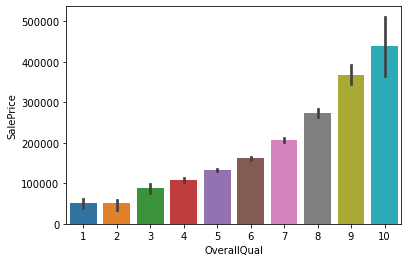

In [169]:
sns.barplot(df.OverallQual,df.SalePrice)

Let's look the pairplot for the above most correlated features

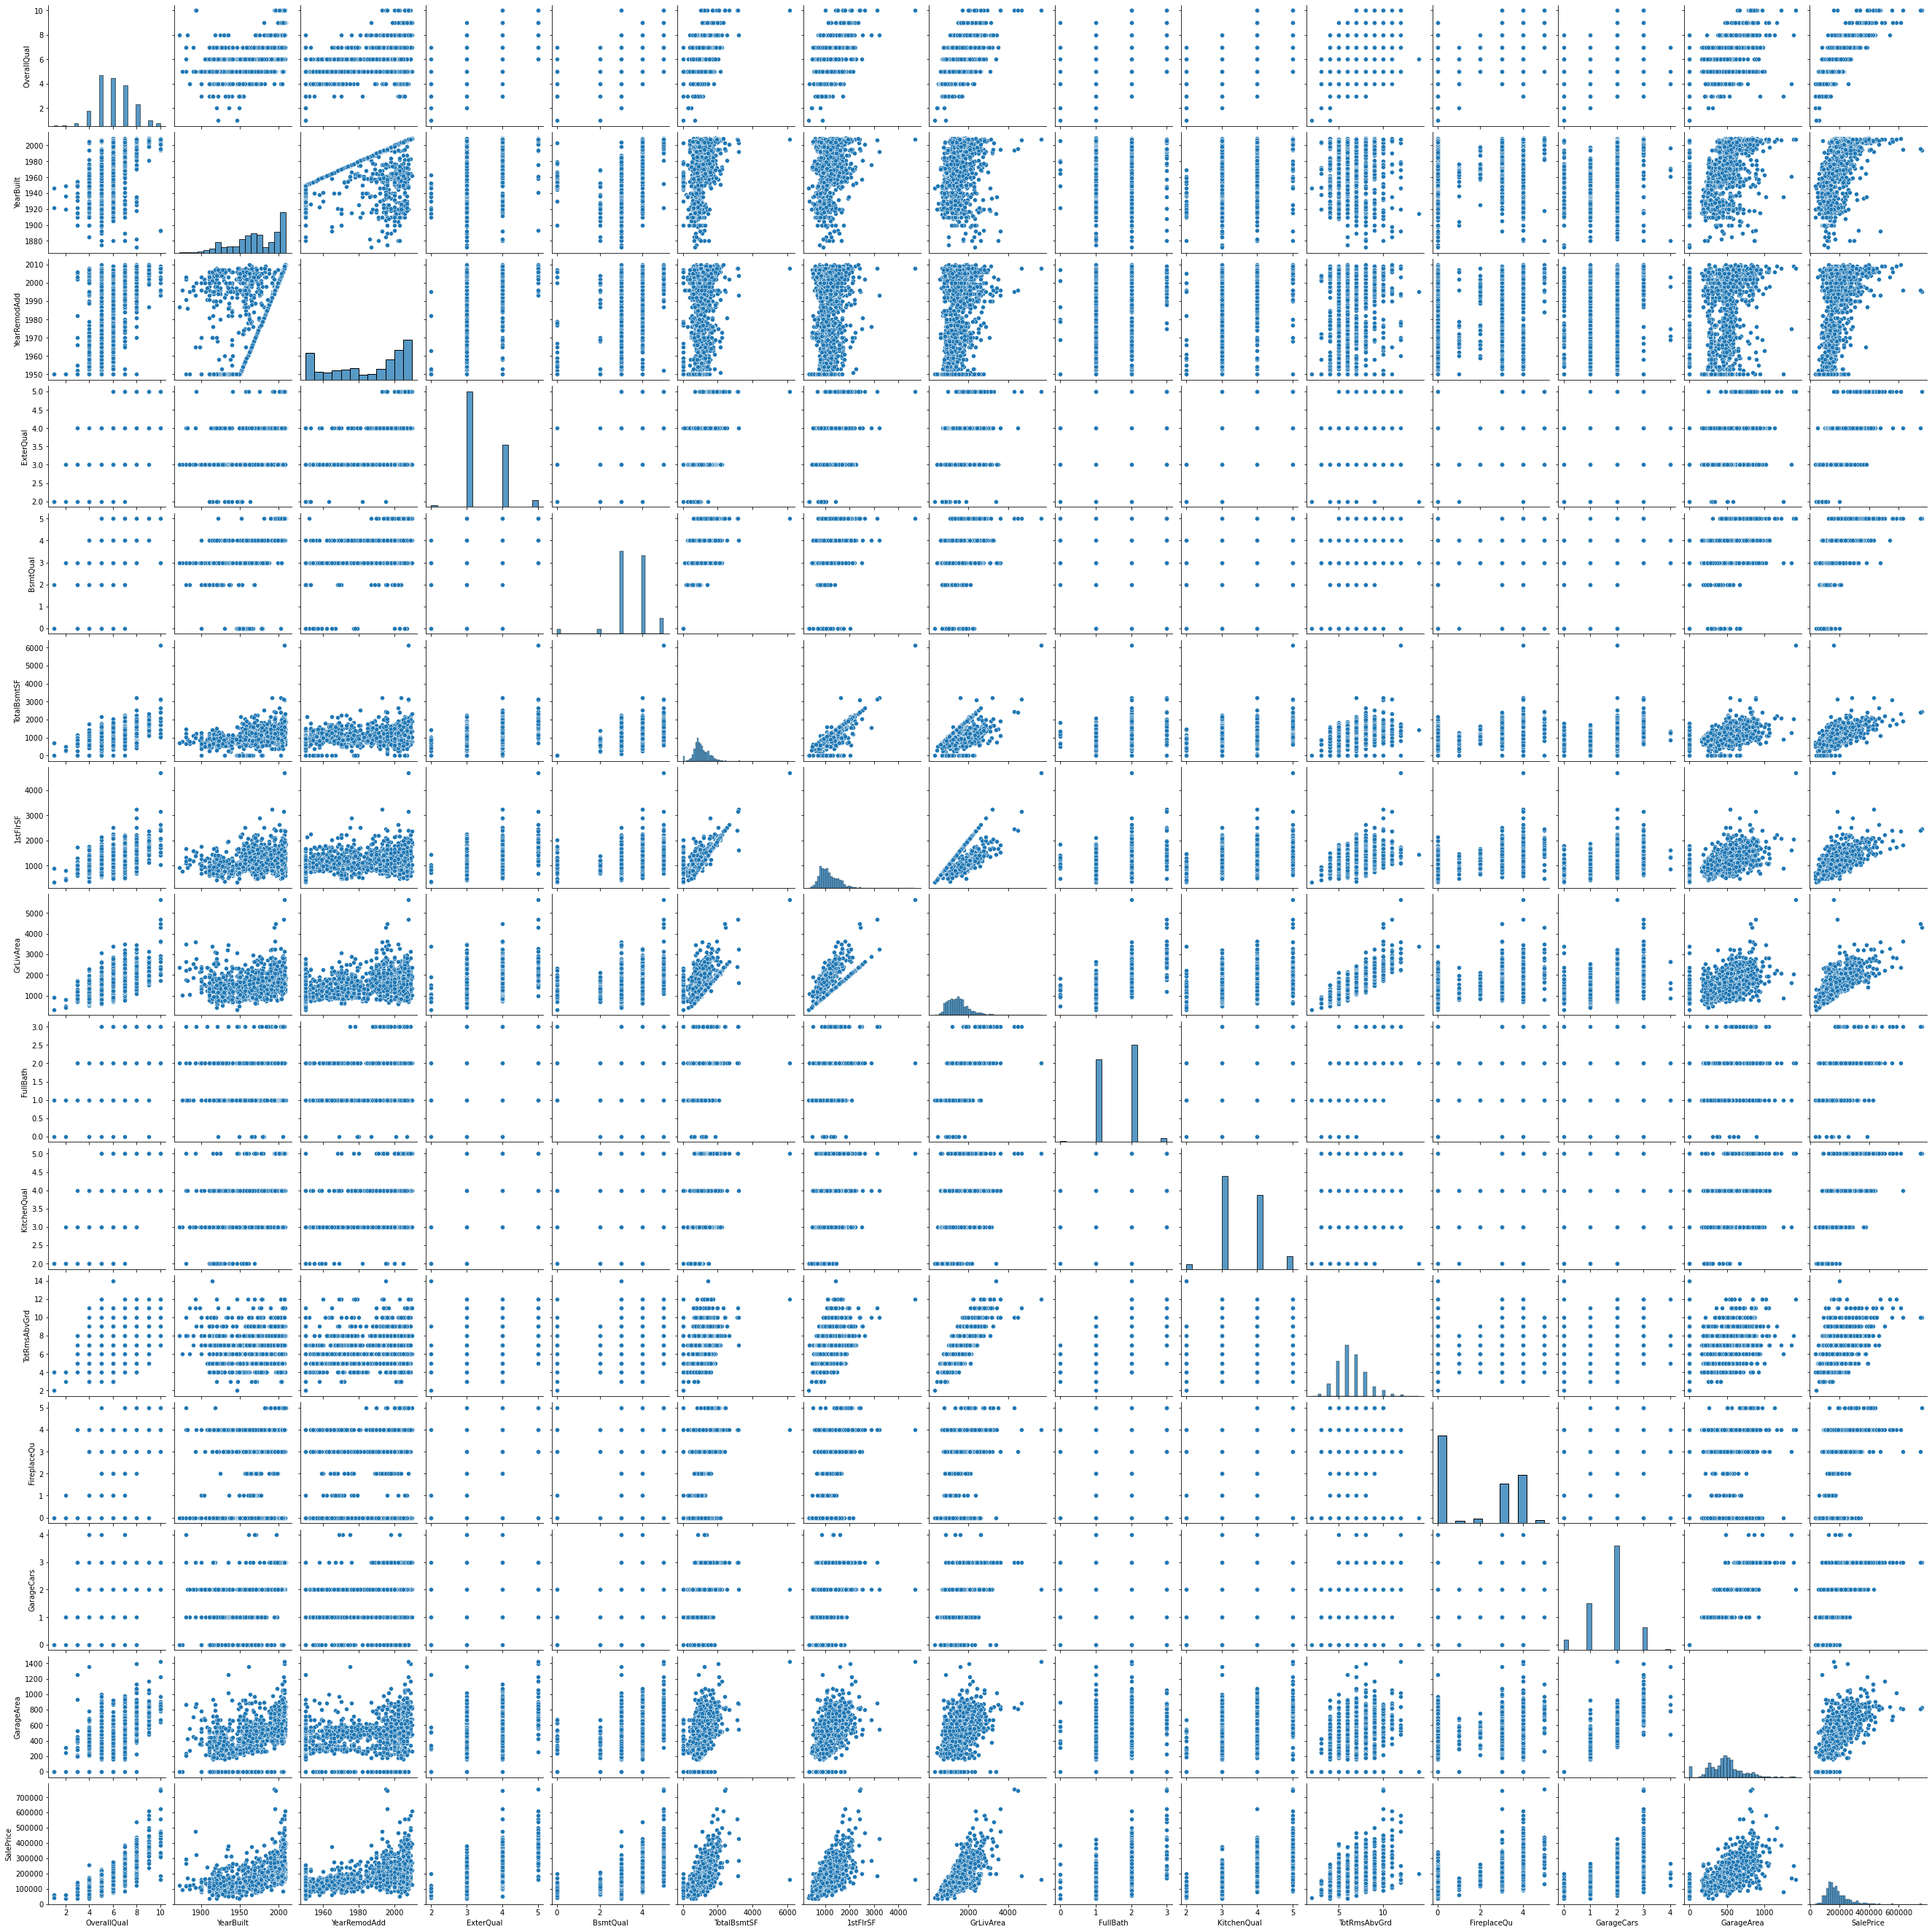

In [111]:
sns.pairplot(df[top_corr_features])
plt.show()

## Feature engineering 

Creating the 3 degree polynomials for the below most 10 correlated features

'OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea'
    

In [170]:
df["OverallQual-s2"] = df["OverallQual"] ** 2
df["OverallQual-s3"] = df["OverallQual"] ** 3

df["YearBuilt-s2"] = df["YearBuilt"] ** 2
df["YearBuilt-s3"] = df["YearBuilt"] ** 3

df["YearRemodAdd-s2"] = df["YearRemodAdd"] ** 2
df["YearRemodAdd-s3"] = df["YearRemodAdd"] ** 3

df["TotalBsmtSF-s2"] = df["TotalBsmtSF"] ** 2
df["TotalBsmtSF-s3"] = df["TotalBsmtSF"] ** 3

df["1stFlrSF-s2"] = df["1stFlrSF"] ** 2
df["1stFlrSF-s3"] = df["1stFlrSF"] ** 3

df["GrLivArea-s2"] = df["GrLivArea"] ** 2
df["GrLivArea-s3"] = df["GrLivArea"] ** 3

df["FullBath-s2"] = df["FullBath"] ** 2
df["FullBath-s3"] = df["FullBath"] ** 3

df["TotRmsAbvGrd-s2"] = df["TotRmsAbvGrd"] ** 2
df["TotRmsAbvGrd-s3"] = df["TotRmsAbvGrd"] ** 3

df["GarageCars-s2"] = df["GarageCars"] ** 2
df["GarageCars-s3"] = df["GarageCars"] ** 3

df["GarageArea-s2"] = df["GarageArea"] ** 2
df["GarageArea-s3"] = df["GarageArea"] ** 3

In [171]:
categorical_features = df.select_dtypes(include = ["object"]).columns
numerical_features = df.select_dtypes(exclude = ["object"]).columns
numerical_features = numerical_features.drop("SalePrice")
print("Numerical features : " + str(len(numerical_features)))
print("Categorical features : " + str(len(categorical_features)))
train_num = df[numerical_features]
train_cat = df[categorical_features]
y=df["SalePrice"]

Numerical features : 73
Categorical features : 26


Checking again once for null values

In [172]:
print(train_cat.isnull().values.sum())
print(train_num.isnull().values.sum())

0
0


#### Create dummy variables for categorical variables

In [173]:
train_cat = pd.get_dummies(train_cat, drop_first=True)

In [174]:
train = pd.concat([train_num, train_cat], axis = 1)

## Modelling
### Splitting the Data into Training and Testing Sets

In [175]:
np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(train, y, train_size = 0.7, test_size = 0.3, random_state = 100)

### Applying Scaling

#### Using Min-Max Scalar

In [178]:
scaler = MinMaxScaler()
X_train.loc[:, numerical_features] = scaler.fit_transform(X_train.loc[:, numerical_features])
# We have to only use transform on test data
X_test.loc[:, numerical_features] = scaler.transform(X_test.loc[:, numerical_features])

### Regression with No Regularization

In [185]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

In [186]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)

y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

#### Calculating r2score, rmse, mse and rss

In [196]:
print("r2score for training data: " + str(r2_score(y_train, y_train_pred)))

rss = np.sum(np.square(y_train - y_train_pred))
mse = mean_squared_error(y_train, y_train_pred)
rmse = mse**0.5

print("RSS for training data: " + str(rss))
print("MSE for training data: " + str(mse))
print("RMSE for training data: " + str(rmse))


r2score for training data: 0.9591311294632506
RSS for training data: 260771953169.8203
MSE for training data: 255408377.24762028
RMSE for training data: 15981.501094941623


In [197]:
print("r2score for training data: " + str(r2_score(y_test, y_test_pred)))

rss = np.sum(np.square(y_test - y_test_pred))
mse = mean_squared_error(y_test, y_test_pred)
rmse = mse**0.5

print("RSS for training data: " + str(rss))
print("MSE for training data: " + str(mse))
print("RMSE for training data: " + str(rmse))


r2score for training data: 0.7556796906971631
RSS for training data: 688668717250.9722
MSE for training data: 1572303007.4223108
RMSE for training data: 39652.2761947194


We can clearly observe that the current model is performing well on training data and performing poorly on test data. The current model is **overfitting**. There arrises the need for regularisation 

### Regression with Ridge Regularization

In [260]:
lambdas = [0, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
for i in lambdas: # for each lambda we get different model coefficients  
    ridgereg = Ridge(alpha = i) # Initialize the Ridge Regression model with a specific lambda
    ridgereg.fit(X_train, y_train) # fit the model on the polynomial features
    
    #Computing the r2 score
    y_train_pred = ridgereg.predict(X_train)
    y_test_pred = ridgereg.predict(X_test)
    print("lambda: " + str(i))
    print("r2 score (Training) = " + str(r2_score(y_train, y_train_pred))) 
    print("r2 score (Test) = " + str(r2_score(y_test, y_test_pred))) 
    print("Most significant predictor variables: \n" + str(list(X_train.columns[ridgereg.coef_.argsort()[-10:][::-1]])))
    print()
    print()


lambda: 0
r2 score (Training) = 0.8677263682223693
r2 score (Test) = -2.9316267726149413e+26
Most significant predictor variables: 
['SaleType_New', 'Exterior2nd_AsphShn', 'TotalBsmtSF', 'BldgType_Duplex', '1stFlrSF', 'GarageType_No', 'MSSubClass_CLS190', '2ndFlrSF', 'Exterior1st_CBlock', 'LowQualFinSF']


lambda: 0.001
r2 score (Training) = 0.9586610018563364
r2 score (Test) = 0.7776836118657965
Most significant predictor variables: 
['TotalBsmtSF-s2', 'RoofMatl_WdShngl', 'RoofMatl_Membran', 'RoofMatl_Roll', 'GrLivArea-s3', 'RoofMatl_CompShg', 'RoofMatl_Metal', 'RoofMatl_Tar&Grv', 'RoofMatl_WdShake', 'GarageArea-s2']


lambda: 0.01
r2 score (Training) = 0.9556853159027113
r2 score (Test) = 0.8141200663677721
Most significant predictor variables: 
['TotalBsmtSF-s2', 'RoofMatl_WdShngl', 'RoofMatl_Membran', 'RoofMatl_Roll', 'RoofMatl_CompShg', 'RoofMatl_Tar&Grv', 'RoofMatl_Metal', 'RoofMatl_WdShake', 'OverallQual-s3', 'GarageArea-s2']


lambda: 0.1
r2 score (Training) = 0.94620276172708


**We can observe that the model fit is optimum at around the lambda: `1`.\
This is because it's performing reasonably well on both test and training data.**


### Regression with Lasso Regularization

In [261]:
lambdas = [0, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
for i in lambdas: # for each lambda we get different model coefficients  
    lassoreg = Lasso(alpha = i) # Initialize the Ridge Regression model with a specific lambda
    lassoreg.fit(X_train, y_train) # fit the model on the polynomial features
    
    #Computing the r2 score
    y_train_pred = lassoreg.predict(X_train)
    y_test_pred = lassoreg.predict(X_test)
    print("lambda: " + str(i))
    print("r2 score (Training) = " + str(r2_score(y_train, y_train_pred))) 
    print("r2 score (Test) = " + str(r2_score(y_test, y_test_pred))) 
    print("Most significant predictor variables: \n" + str(list(X_train.columns[lassoreg.coef_.argsort()[-10:][::-1]])))
    print("Lasso eliminated features: " + str(len(lassoreg.coef_[lassoreg.coef_ == 0])))
    print()
    print()

lambda: 0
r2 score (Training) = 0.9583925696102538
r2 score (Test) = 0.7689532584666017
Most significant predictor variables: 
['TotalBsmtSF-s2', 'GrLivArea-s3', 'RoofMatl_Membran', 'RoofMatl_WdShngl', 'RoofMatl_Roll', 'RoofMatl_Metal', 'RoofMatl_CompShg', 'RoofMatl_Tar&Grv', 'RoofMatl_WdShake', 'GarageArea-s2']
Lasso eliminated features: 3


lambda: 0.001
r2 score (Training) = 0.9583921833507181
r2 score (Test) = 0.7689913634041181
Most significant predictor variables: 
['TotalBsmtSF-s2', 'GrLivArea-s3', 'RoofMatl_Membran', 'RoofMatl_WdShngl', 'RoofMatl_Roll', 'RoofMatl_Metal', 'RoofMatl_CompShg', 'RoofMatl_Tar&Grv', 'RoofMatl_WdShake', 'GarageArea-s2']
Lasso eliminated features: 4


lambda: 0.01
r2 score (Training) = 0.9583886569977902
r2 score (Test) = 0.7691777976254557
Most significant predictor variables: 
['TotalBsmtSF-s2', 'GrLivArea-s3', 'RoofMatl_Membran', 'RoofMatl_WdShngl', 'RoofMatl_Roll', 'RoofMatl_Metal', 'RoofMatl_CompShg', 'RoofMatl_Tar&Grv', 'RoofMatl_WdShake', 'Garag

**We can observe that the model fit is optimum at around the lambda: `100`.\
This is because it's performing reasonably well on both test and training data.**
